## Import Data

In [1]:
import numpy as np
import imdb 
import pandas as pd
#from error_generator import Explicit_Missing_Value
#from error_generator import Implicit_Missing_Value
#from error_generator import White_Noise
#from error_generator import Gaussian_Noise
from error_generator import Random_Active_Domain
from error_generator import Similar_Based_Active_Domain
from error_generator import Typo_Keyboard
from error_generator import Typo_Butterfingers
from error_generator import Word2vec_Nearest_Neighbor
from error_generator import Value_Selector
from error_generator import List_selected
from error_generator import Read_Write
from error_generator import Error_Generator
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

anime_data = pd.read_csv("../../new_anime_data1.csv", index_col=0)

anime_data['episodes'] = anime_data['episodes'].replace('Unknown', np.nan)


c:\users\larat\appdata\local\programs\python\python37-32\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Cleaning

In [2]:
l1 = []
l2 = []
l3 = []


anime_data['genre'].fillna('',  inplace=True)
anime_data['overview'].fillna('',  inplace=True)
anime_data['type'].fillna('',  inplace=True)
for index, row in anime_data.iterrows():
    item = row['genre']
    if(pd.isnull(item)):
            item =""
    else:
        if isinstance(item, (list, tuple)):
            item = ','.join(item)
        else:
            item = item.replace(" ","")
            item = item.replace("[","")
            item = item.replace("]","")
            item = item.replace("'","")
    l1.append(item) 
      

for index, row in anime_data.iterrows():
    item = row['overview']
    if(pd.isnull(row['overview'])):
            item = ""
    else:
       # for item in anime_data['overview']:
            if isinstance(item, (list, tuple)):
                item = ','.join(item)
            else:
                item = item.replace("[","")
                item = item.replace("]","")
    l2.append(item) 

for index, row in anime_data.iterrows():
    item = row['type']
    if(pd.isnull(row['type'])):
        item = np.nan
    else:    
        if "movie" in item:
            item = "movie"
        else:
            item = "tv series"
    l3.append(item)

    
    
anime_data['genre'] = l1   
anime_data['overview'] = l2
anime_data['type'] = l3

#drop dublicate
anime_data.drop_duplicates(inplace = True)



## Sampling

In [3]:
anime_train, anime_test = train_test_split(anime_data, test_size=0.2)
anime_test.to_csv("testDataset.csv", index = False,
                  columns = ['anime_id', 'name','genre','type', 'episodes','rating', 'members', 'overview'])

## Generating Errors

In [4]:
def error_generater(dataset, method, n, ignored_columns):

    myselector=List_selected()

    mygen=Error_Generator()

    new_dataset=mygen.error_generator(method_gen=method,selector=myselector,percentage=n,dataset=dataset,mute_column = ignored_columns)
    
    return new_dataset

In [5]:
# generate error in the training set
new_dataset = error_generater(anime_train.values.tolist(), Typo_Butterfingers(),75, ignored_columns = [0,1,3,4,5,6,7])
Read_Write.write_csv_dataset("./{}.csv".format(Typo_Butterfingers().name), new_dataset)
anime_train = pd.read_csv("./{}.csv".format(Typo_Butterfingers().name), 
                            names = ['anime_id', 'name','genre','type', 'episodes','rating', 'members', 'overview'])
anime_train.to_csv("dirtyTrainDataset.csv", index = False,
                  columns = ['anime_id', 'name','genre','type', 'episodes','rating', 'members', 'overview'])

---------Change according to Typo_Butterfingers method ---------------

row: 1019 col: 2 : 'Animation' changed to 'Ahimaelln'  
row: 1505 col: 2 : 'Drama' changed to 'Gsxmx'  
row: 509 col: 2 : 'Animation' changed to 'Cnimatioh'  
row: 1200 col: 2 : 'Music' changed to 'Kuslc'  
row: 288 col: 2 : 'Historical' changed to 'Hnsfpvicwl'  
row: 454 col: 2 : 'Drama' changed to 'Drans'  
row: 1557 col: 2 : 'Animation,Action,Comedy,Drama,Sci-Fi' changed to 'Aiojqbjon,Zceimn,Eknedf,Sdaja,Aci-Gy'  
row: 649 col: 2 : 'Animation,Comedy,Drama' changed to 'Wgonajijt,Rimfdj,Aranq'  
row: 600 col: 2 : 'Animation,Drama' changed to 'Qhilwtjkn,Dxema'  
row: 1017 col: 2 : 'Drama,Historical,Music,Romance' changed to 'Drqms,Historizdp,Mksuc,Rknanba'  
row: 242 col: 2 : 'Animation,Action,Sci-Fi' changed to 'Ahikztiun,Acguon,Sfi-Nu'  
row: 1514 col: 2 : 'Animation,Adventure,Action,Comedy,Sci-Fi' changed to 'Whmkatlun,Wdcznvyxa,Xeeiob,Somzdv,Sck-Dl'  
row: 1160 col: 2 : 'Action' changed to 'Zcgnoj'  
row: 1318 

row: 708 col: 2 : 'Comedy' changed to 'Cojevy'  
row: 1525 col: 2 : 'Drama' changed to 'Graka'  
row: 1132 col: 2 : 'Animation,Comedy,Sci-Fi' changed to 'Snlmztkkn,Fpnxdh,Dci-Gi'  
row: 703 col: 2 : 'SliceofLife' changed to 'SmprzoxLige'  
row: 988 col: 2 : 'Animation,Action,Fantasy' changed to 'Ehnkarion,Cbyilu,Famyxsn'  
row: 887 col: 2 : 'Animation,Comedy,Romance' changed to 'Auuoatnoh,Cmlxdn,Roowvfr'  
row: 996 col: 2 : 'Kids' changed to 'Ilds'  
row: 321 col: 2 : 'Comedy,Ecchi,School,Shounen' changed to 'Gkledj,Ezdgi,Aehplp,Fhpuksi'  
row: 575 col: 2 : 'SliceofLife' changed to 'SpicvpxLiyg'  
row: 200 col: 2 : 'Comedy,Kids' changed to 'Cojedv,Kjfw'  
row: 1451 col: 2 : 'Comedy,Fantasy,Supernatural' changed to 'Romgfy,Fxntzwr,Ruoevgxthtqp'  
row: 1227 col: 2 : 'Fantasy' changed to 'Gakjddn'  
row: 231 col: 2 : 'Animation,Action,Adventure,Crime' changed to 'Animstijv,Acroon,Acxtutire,Cgint'  
row: 306 col: 2 : 'Animation,Adventure,Fantasy' changed to 'Ctpmatiok,Qdcentugv,Gwbtwry'  


## Transformation

In [6]:
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
def get_words(x):
    bagofwords=[]
    for i in x:
        if i[1]=='NN':
            bagofwords.append(i[0])
        elif i[1]=='NNS':
            bagofwords.append(i[0])
        elif i[1]=='NNP':
            bagofwords.append(i[0])
        elif i[1]=='NNPS':
            bagofwords.append(i[0])
        elif i[1]=='JJ':
            bagofwords.append(i[0])
        elif i[1]=='JJR':
            bagofwords.append(i[0])
        elif i[1]=='JJS':
            bagofwords.append(i[0])
        elif i[1]=='RB':
            bagofwords.append(i[0])
        elif i[1]=='RBR':
            bagofwords.append(i[0])
        elif i[1]=='RBS':
            bagofwords.append(i[0])
    return bagofwords

def clean_words(x):
    b=nltk.pos_tag(nltk.word_tokenize(x))
    result=get_words(b)
    return result

In [7]:
def get_dummies(train_data_set, test_data_set):
    train_dummies = train_data_set.genre.str.get_dummies(',')
    test_dummies = test_data_set.genre.str.get_dummies(',')
    
    #print("Train Dummies",train_dummies.shape)    
    #print("Test Dummies",test_dummies.shape)
    
    #### ALİGN
    train_dummies, test_dummies = train_dummies.align(test_dummies, axis=1, join='left')
    
    test_dummies.fillna(0, inplace=True)
    
    type_lb = LabelBinarizer()
    fitted_type_lb = type_lb.fit(train_data_set.type.values)
    X_train = type_lb.transform(train_data_set.type.values)
    X_test  = type_lb.transform(test_data_set.type.values)
    
    dfOneHot_train = pd.DataFrame(X_train, columns = ["movie/TVseries" for i in range(X_train.shape[1])])
    dfOneHot_test  = pd.DataFrame(X_test,  columns = ["movie/TVseries" for i in range(X_test.shape[1])])
    
    
    train_data_set = pd.concat([train_data_set, dfOneHot_train], axis=1, join="inner")
    train_data_set = pd.concat([train_data_set, train_dummies ], axis=1, join="inner")

    test_data_set = pd.concat([test_data_set, dfOneHot_test], axis=1)
    test_data_set = pd.concat([test_data_set, test_dummies],  axis=1)
    
    test_data_set['movie/TVseries'].fillna(0, inplace=True)
    train_data_set['movie/TVseries'].fillna(0, inplace=True)

    return ([train_data_set, test_data_set])

def feature_transformation(train_data_set, test_data_set):
    
    dummieset = get_dummies(train_data_set, test_data_set)
    train_data_set = dummieset[0]
    test_data_set = dummieset[1]
        
    #Bag of Words
    summary_doc_train = train_data_set['overview'].fillna("").map(clean_words)
    summary_doc_train =summary_doc_train.apply(','.join)
    
    summary_doc_test = test_data_set['overview'].fillna("").map(clean_words)
    summary_doc_test =summary_doc_test.apply(','.join)
 
    vectorizer = TfidfVectorizer()
    fitted_vectorizer = vectorizer.fit(summary_doc_train)
    overview_feature_train = fitted_vectorizer.transform(summary_doc_train).toarray()
    overview_feature_test = fitted_vectorizer.transform(summary_doc_test).toarray()

    df_train = pd.DataFrame(overview_feature_train, columns = ["word"+ str(int(i)) for i in range(overview_feature_train.shape[1])])
    train_data_set = pd.concat([train_data_set, df_train], axis=1)
    
    df_test = pd.DataFrame(overview_feature_test, columns = ["word"+ str(int(i)) for i in range(overview_feature_test.shape[1])])
    test_data_set = pd.concat([test_data_set, df_test], axis=1)
    
    train_data_set = train_data_set.drop(columns=['anime_id', 'name', 'genre', 'overview', 'type'])
    test_data_set = test_data_set.drop(columns=['anime_id', 'name', 'genre', 'overview', 'type'])
    
    #drop NaN values
    train_data_set.dropna(inplace=True)
    test_data_set.dropna(inplace=True)
    
    train_data_set.fillna(0, inplace=True)
    test_data_set.fillna(0, inplace=True)
    
    return ([train_data_set, test_data_set])


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

'''
anime_train = feature_transformation(anime_train)
anime_test = feature_transformation(anime_test)
'''
transformed_features = feature_transformation(anime_train, anime_test)

anime_train = transformed_features[0]
anime_test = transformed_features[1]

In [9]:
#anime_train = anime_train.dropna()
print(anime_train.shape)
print(anime_test.shape)

(1548, 10527)
(23, 10527)


In [10]:
anime_y_train = anime_train['rating']
anime_X_train = anime_train.drop(columns=['rating'])

anime_y_test = anime_test['rating']
anime_X_test = anime_test.drop(columns=['rating'])


## Feature Selection

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

selector = SelectKBest(score_func=f_regression,k=700)#anime_X_test.shape[1]-1)
features = selector.fit(anime_X_train, anime_y_train)

# summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)

print(anime_X_train.shape)
print(anime_X_test.shape)
anime_X_train = features.transform(anime_X_train)
anime_X_test = features.transform(anime_X_test)
print(anime_X_train.shape)
print(anime_X_test.shape)

scaler = StandardScaler() 

# Apply transform to both the training set and the test set.
anime_X_train = scaler.fit_transform(anime_X_train)  
anime_X_test = scaler.transform(anime_X_test) 

(1548, 10526)
(23, 10526)
(1548, 700)
(23, 700)


## Training - Testing - Evaluation

In [12]:
def training(model, dataset, label):
    clf = model
    clf.fit(dataset, label)
    return clf

def testing_evaluation(model, testset):
    # Make predictions using the testing set
    anime_y_pred = model.predict(testset)

    # The mean absolute error
    print("Mean absolute error: %.2f" % np.sqrt(mean_absolute_error(anime_y_test, anime_y_pred)))

    # The mean squared error
    print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(anime_y_test, anime_y_pred)))

    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(anime_y_test, anime_y_pred))

### Linear Regression

In [13]:
clf = training(model = linear_model.LinearRegression(), dataset = anime_X_train, label= anime_y_train)
testing_evaluation(clf, anime_X_test)

Mean absolute error: 1.11
Mean squared error: 1.37
Variance score: -15.04


### Lesso Regression

In [14]:
clf = training(model = linear_model.Lasso(), dataset = anime_X_train, label= anime_y_train)
testing_evaluation(clf, anime_X_test)

Mean absolute error: 1.31
Mean squared error: 1.75
Variance score: -24.99


### LassoCV

In [15]:
'''
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 100)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas, cv = 5)
visualizer = AlphaSelection(model)

visualizer.fit(anime_X_train, anime_y_train)
g = visualizer.poof()
'''


'\n# Create a list of alphas to cross-validate against\nalphas = np.logspace(-10, 1, 100)\n\n# Instantiate the linear model and visualizer\nmodel = LassoCV(alphas=alphas, cv = 5)\nvisualizer = AlphaSelection(model)\n\nvisualizer.fit(anime_X_train, anime_y_train)\ng = visualizer.poof()\n'

### Cross Validation

In [16]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
scores = cross_val_score(clf, anime_X_train, anime_y_train, scoring="neg_mean_squared_error", cv=5) 
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores: [0.982 1.038 1.042 0.903 1.117]
Mean: 1.0163364571857305
Standard deviation: 0.07105670183925278


### Grid Search For Hyper Parameter Selection

In [17]:
def checkHP(model, folds, dataset, label):
    parameters = {
                    "alpha" : [1,0.1,0.01,0.001,0.0001,0]
                  }

    gd_sr = GridSearchCV(estimator=model,  
                         param_grid=parameters,
                         scoring="neg_mean_squared_error",
                         cv=folds)

    gd_sr.fit(dataset, label)  
    
    best_parameters = gd_sr.best_params_  
    print("best parameters are: ", best_parameters)

    best_result = gd_sr.best_score_  
    print("The mean squared Error is: %.2f" % -best_result) 
    
checkHP(clf, 5, anime_X_train, anime_y_train) 

best parameters are:  {'alpha': 0.01}
The mean squared Error is: 0.89


In [23]:
clf = training(model = linear_model.Lasso(alpha = 0.01), dataset = anime_X_train, label= anime_y_train)
testing_evaluation(clf, anime_X_test)

Mean absolute error: 1.10
Mean squared error: 1.36
Variance score: -14.71


### Evaluation the repairing of different methods on different amount of error in the data

### Replace with the most frequented Word

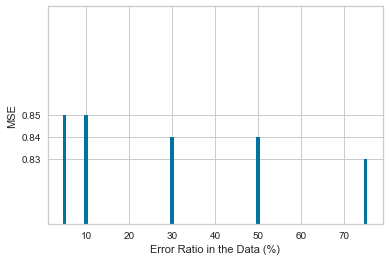

In [19]:
plt.xlabel('Error Ratio in the Data (%)')
plt.ylabel('MSE')

plt.ylim(0.80, 0.90)
plt.bar([5, 10, 30, 50, 75], [0.85, 0.85, 0.84, 0.84, 0.83])
plt.yticks([0.85, 0.84, 0.83])
plt.show()

### Drop

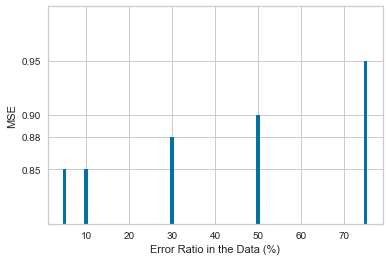

In [20]:
plt.xlabel('Error Ratio in the Data (%)')
plt.ylabel('MSE')

plt.ylim(0.80, 1)
plt.bar([5, 10, 30, 50, 75], [0.85, 0.85,0.88,0.90,0.95 ])
plt.yticks([0.85,0.88,0.90,0.95])
plt.show()

### Use Dict

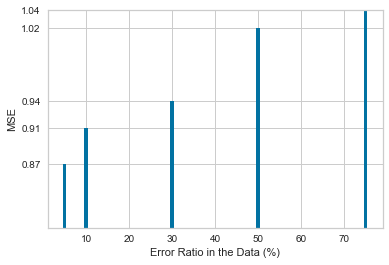

In [21]:
plt.xlabel('Error Ratio in the Data (%)')
plt.ylabel('MSE')

plt.ylim(0.80, 1)
plt.bar([5, 10, 30, 50, 75], [0.87, 0.91, 0.94, 1.02,1.04])
plt.yticks([0.87,0.91,0.94,1.02,1.04])
plt.show()

### Use pattern library

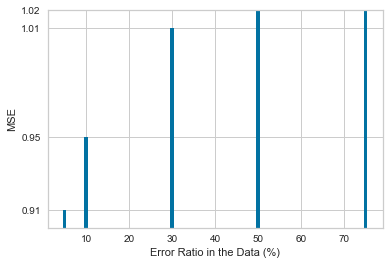

In [25]:
plt.xlabel('Error Ratio in the Data (%)')
plt.ylabel('MSE')

plt.ylim(0.90, 1)
plt.bar([5, 10, 30, 50, 75], [0.91,0.95, 1.01, 1.02,1.02])
plt.yticks([0.91,1.02, 0.95, 1.01])
plt.show()